This method relies on the automorphism orbits of vertices, which are the sets of nodes such that there exists automorphisms amongst one another. All nodes in a given automorphism orbit play an identical structural role in the network, and are only distinguishable by having distinct node labels.

**Requirements**
The python package *pynauty* is needed. You can istall it using conda 

```conda install -c conda-forge pynauty```

or with pip (we used pip)

```pip install --upgrade pynauty```

It is suggested to create a new environment sinze pynauty can create conflicts. The other packages that are needed for this example are *networkx* and *matplotlib*.

**Ref**
[1] Yanghua Xiao, Ben D MacArthur, Hui Wang, Momiao Xiong, and Wei Wang. “Network quotients: Structural skeletons of complex systems”. In: Physical Review E 78.4 (2008), p. 046102. doi: 10.1103/PhysRevE.78.046102.

In [1]:
import os
# If you are running this from ~/python_scripts/mycode.py
# change directory to the root of the repository
# All utils assume that the working directory is the root directory of the github folder
os.chdir('../')

import sys
sys.path.insert(0, os.path.join(os.getcwd(),'utils'))

# import local utils
from utils.quotients import *
import matplotlib.pyplot as plt
from utils.visualization import *

### Karate club as an example

In [2]:
gnx = nx.karate_club_graph()

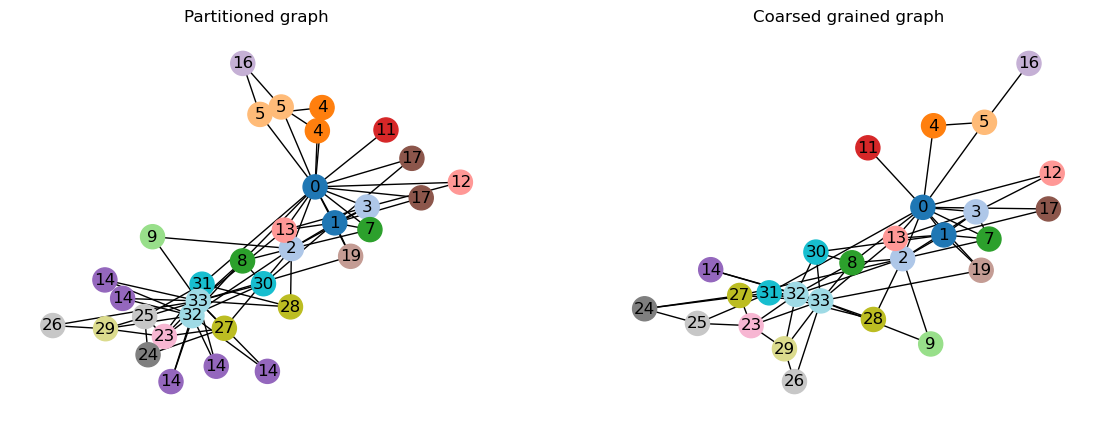

In [3]:
coarse_grained_net = get_coarse_grained_net(gnx)

fig, axs = plt.subplots(1,2, figsize = (14,5))

node_colors = [v[1]['partition'] for v in gnx.nodes(data=True)]
label_dic = {v[0]:v[1]['partition'] for v in gnx.nodes(data=True)}

nx.draw(gnx, node_color = node_colors, cmap = plt.cm.tab20, labels = label_dic, ax=axs[0])
axs[0].set_title('Partitioned graph')

node_colors = [v[1]['partition'] for v in coarse_grained_net.nodes(data=True)]
label_dic = {v[0]:v[1]['partition'] for v in coarse_grained_net.nodes(data=True)}

nx.draw(coarse_grained_net,node_color=node_colors, cmap = plt.cm.tab20, labels = label_dic, ax=axs[1])
axs[1].set_title('Coarsed grained graph')

plt.show()

### Toy example (from the paper)

In [11]:
g = nx.Graph()
g.add_edges_from([
    (0,1),
    (2,1),
    (3,1),
    (1,4),
    (4,5),
    (4,6),
    (4,7),
    (5,8),
    (7,9),
    (7,6),
    (5,6),
    (6,10),
    (6,11),
    (10,12),
    (10,13),
    (10,14),
    (11,12),
    (11,13),
    (11,14),
    (12,13),
    (12,14),
    (13,14)
])

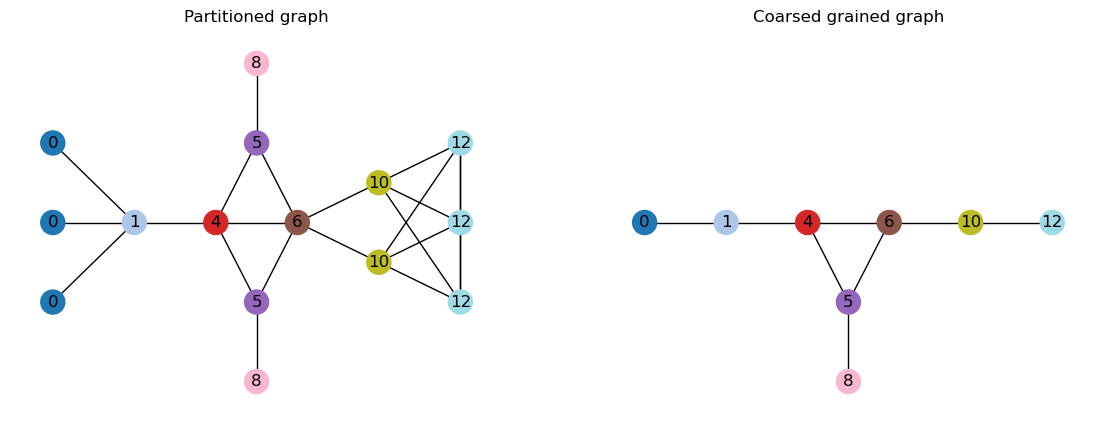

In [16]:
coarse_grained_net = get_coarse_grained_net(g)

pos_g = {
    0: (0,0),
    1: (1,0),
    2: (0,1),
    3: (0,-1),
    4: (2,0),
    5: (2.5,-1),
    6: (3,0),
    7: (2.5,1),
    8: (2.5,-2),
    9: (2.5,2),
    10: (4,0.5),
    11: (4,-0.5),
    12: (5,0),
    13: (5,1),
    14: (5,-1)
}

pos_course = {
    0: (0,0),
    1: (1,0),
    4: (2,0),
    5: (2.5,-1),
    6: (3,0),
    8: (2.5,-2),
    10: (4,0),
    12: (5,0)
}

fig, axs = plt.subplots(1,2, figsize = (14,5))

node_colors = [v[1]['partition'] for v in g.nodes(data=True)]
label_dic = {v[0]:v[1]['partition'] for v in g.nodes(data=True)}

nx.draw(g,pos = pos_g, node_color = node_colors, cmap = plt.cm.tab20, labels = label_dic, ax=axs[0])
axs[0].set_title('Partitioned graph')

node_colors = [v[1]['partition'] for v in coarse_grained_net.nodes(data=True)]
label_dic = {v[0]:v[1]['partition'] for v in coarse_grained_net.nodes(data=True)}

nx.draw(coarse_grained_net, pos = pos_course, node_color=node_colors, cmap = plt.cm.tab20, labels = label_dic, ax=axs[1])
axs[1].set_title('Coarsed grained graph')

axs[1].set_ylim(axs[0].get_ylim())

plt.show()

### Plot with vizualization util

In [ ]:
### make it compatible with 'coarse_grained_visualization'
h,h_cg,node_dict = convert_to_igraph(g, coarse_grained_net)
###
coarse_grained_visualization(g = h,layout=False, g_cg = h_cg,node_dict=node_dict)

### Plot example from paper

In [ ]:
g = nx.read_pajek('./data/PhD.paj')
# some preprocessing
g = g.to_undirected()
nx.relabel_nodes(g,mapping={n:i for i,n in enumerate(g.nodes)},copy=False)
for v in g.nodes:
    del g.nodes[v]['shape']

coarse_grained_net = get_coarse_grained_net(g)
### make it compatible with 'coarse_grained_visualization'
h,h_cg,node_dict = convert_to_igraph(g, coarse_grained_net)
###

coarse_grained_visualization(g = h,layout=False, g_cg = h_cg,node_dict=node_dict,figure_name='PhD_real.png')